In [71]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano 
import theano.tensor as tt
import arviz as az
from pprint import pprint
from scipy import stats
import pandas as pd
import matplotlib.cm as cm

import examples
from examples import create_sample_data, fit_sample_data, fit_sample_data_marginalized

ImportError: cannot import name 'fit_sample_data_marginalized' from 'examples' (C:\Users\faust\Dropbox\Amsterdam\neuralNetsLoT\NeuralNetworksLoT\bayesianModel\examples.py)

In [2]:
from importlib import reload

In [3]:
reload(examples)
from examples import create_sample_data

# Produce simulated data

In [4]:
sample_data = create_sample_data()

In [5]:
sample_data

{'sigma': 2,
 'a_0': 0,
 'a_1': 1,
 'z': 0,
 'a': array([[5. , 6.1, 4.1],
        [3. , 2. , 1. ],
        [2. , 4. , 5. ],
        [5. , 6. , 4. ]]),
 'category_i': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 'mu_i': array([5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 6.1, 6.1,
        6.1, 6.1, 6.1, 6.1,

In [6]:
L = sample_data['a']
category_i = sample_data['category_i']
outcome_i = sample_data['outcome_i']

In [7]:
df = pd.DataFrame({'cat':category_i,'outcome':outcome_i})

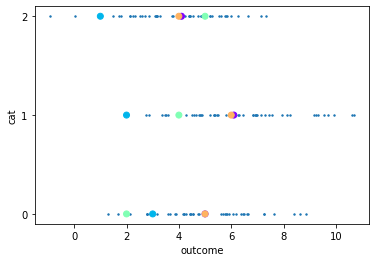

In [9]:
fig, ax = plt.subplots()

df.plot(
    kind='scatter',
    x='outcome',
    y='cat',
    yticks=np.arange(3),
    s=2,
    ax=ax
)

color=cm.rainbow(np.linspace(0,1,len(L)+1))

for i, LoT_costs in enumerate(L):
    ax.scatter(
        x=LoT_costs,
        y=np.arange(len(LoT_costs)),
        c=[color[i]]*len(LoT_costs),
    )

# Bayesian model tests

## NUTS fit

array([[<AxesSubplot:title={'center':'a_0'}>,
        <AxesSubplot:title={'center':'a_1'}>,
        <AxesSubplot:title={'center':'sigma\n0'}>],
       [<AxesSubplot:title={'center':'sigma\n1'}>,
        <AxesSubplot:title={'center':'sigma\n2'}>,
        <AxesSubplot:title={'center':'z_logp\n0'}>],
       [<AxesSubplot:title={'center':'z_logp\n1'}>,
        <AxesSubplot:title={'center':'z_logp\n2'}>,
        <AxesSubplot:title={'center':'z_logp\n3'}>]], dtype=object)

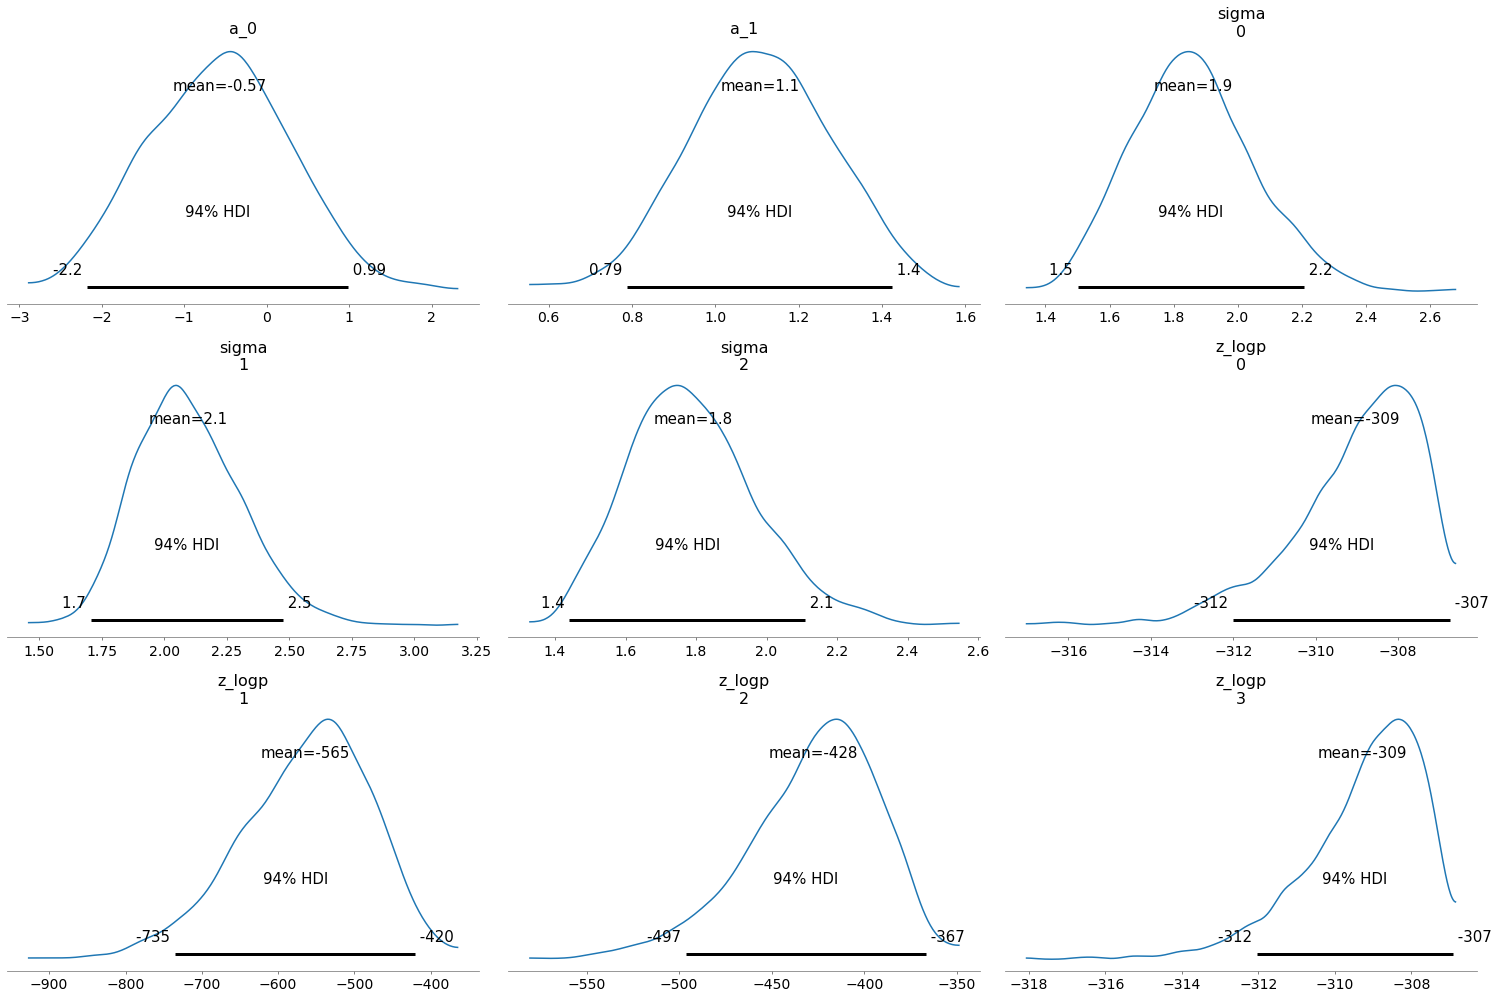

In [125]:
az.plot_posterior(trace)

In [65]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> constant_data

## Variational fit

In [33]:
trace_fit = fit.sample(5000)

In [34]:
trace_fit_az = az.from_pymc3(trace_fit, model=model)

array([[<AxesSubplot:title={'center':'a_0'}>,
        <AxesSubplot:title={'center':'a_1'}>,
        <AxesSubplot:title={'center':'sigma\n0'}>],
       [<AxesSubplot:title={'center':'sigma\n1'}>,
        <AxesSubplot:title={'center':'sigma\n2'}>,
        <AxesSubplot:title={'center':'z_logp\n0'}>],
       [<AxesSubplot:title={'center':'z_logp\n1'}>,
        <AxesSubplot:title={'center':'z_logp\n2'}>,
        <AxesSubplot:title={'center':'z_logp\n3'}>]], dtype=object)

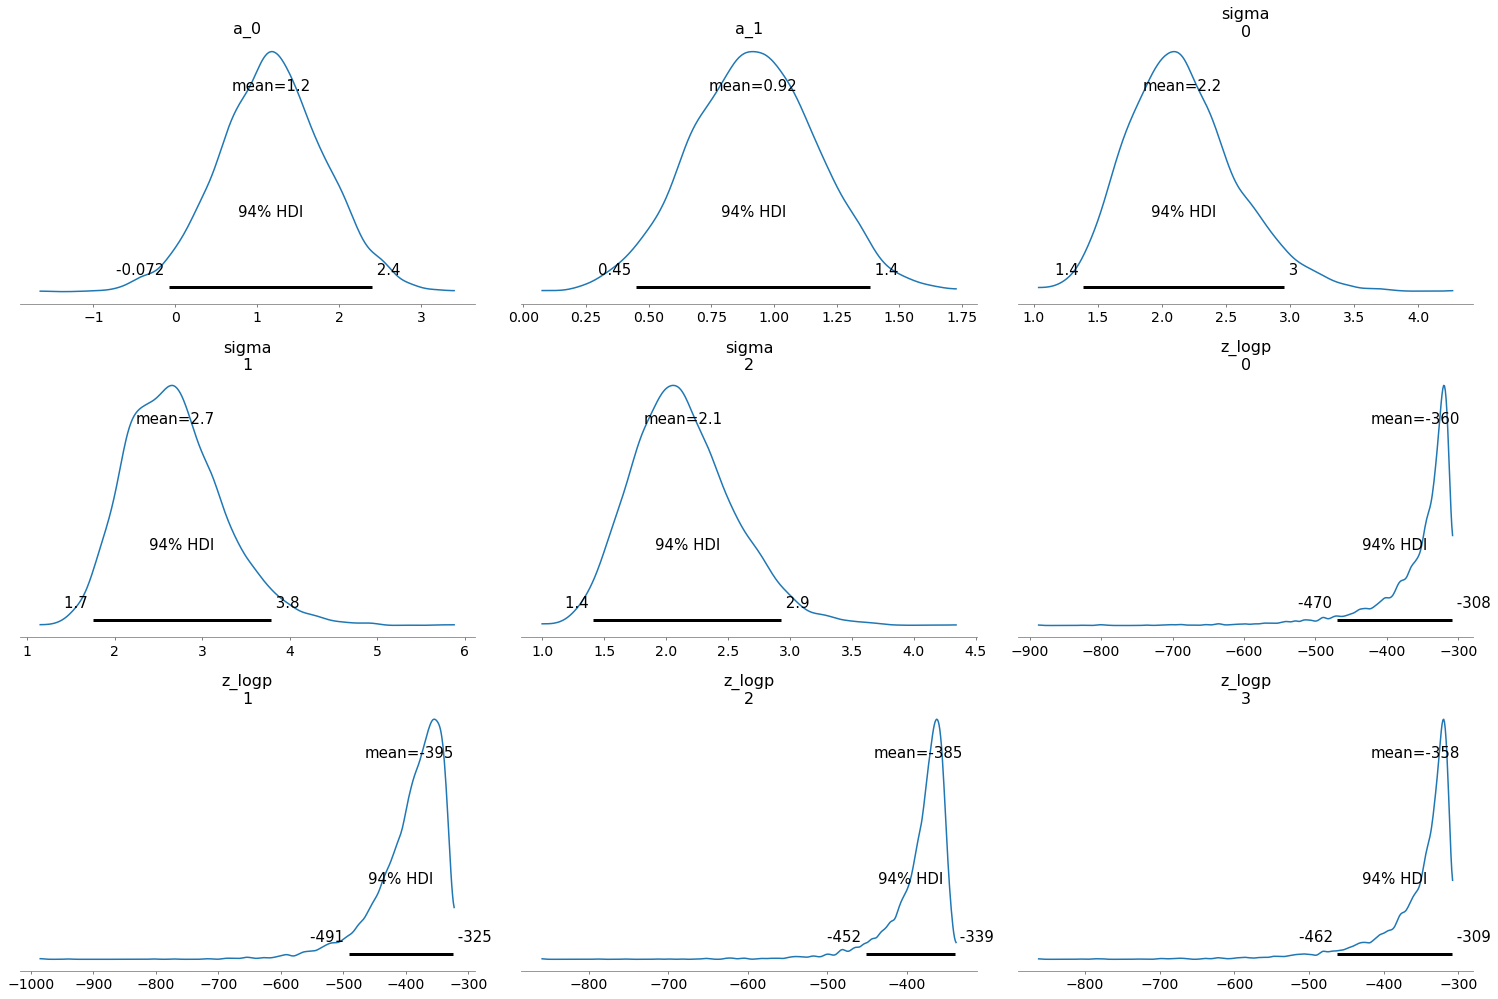

In [35]:
az.plot_posterior(trace_fit_az)

array([[<AxesSubplot:ylabel='a_1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='sigma\n0'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='sigma\n1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='sigma\n2'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='z_logp\n0'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='z_logp\n1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        

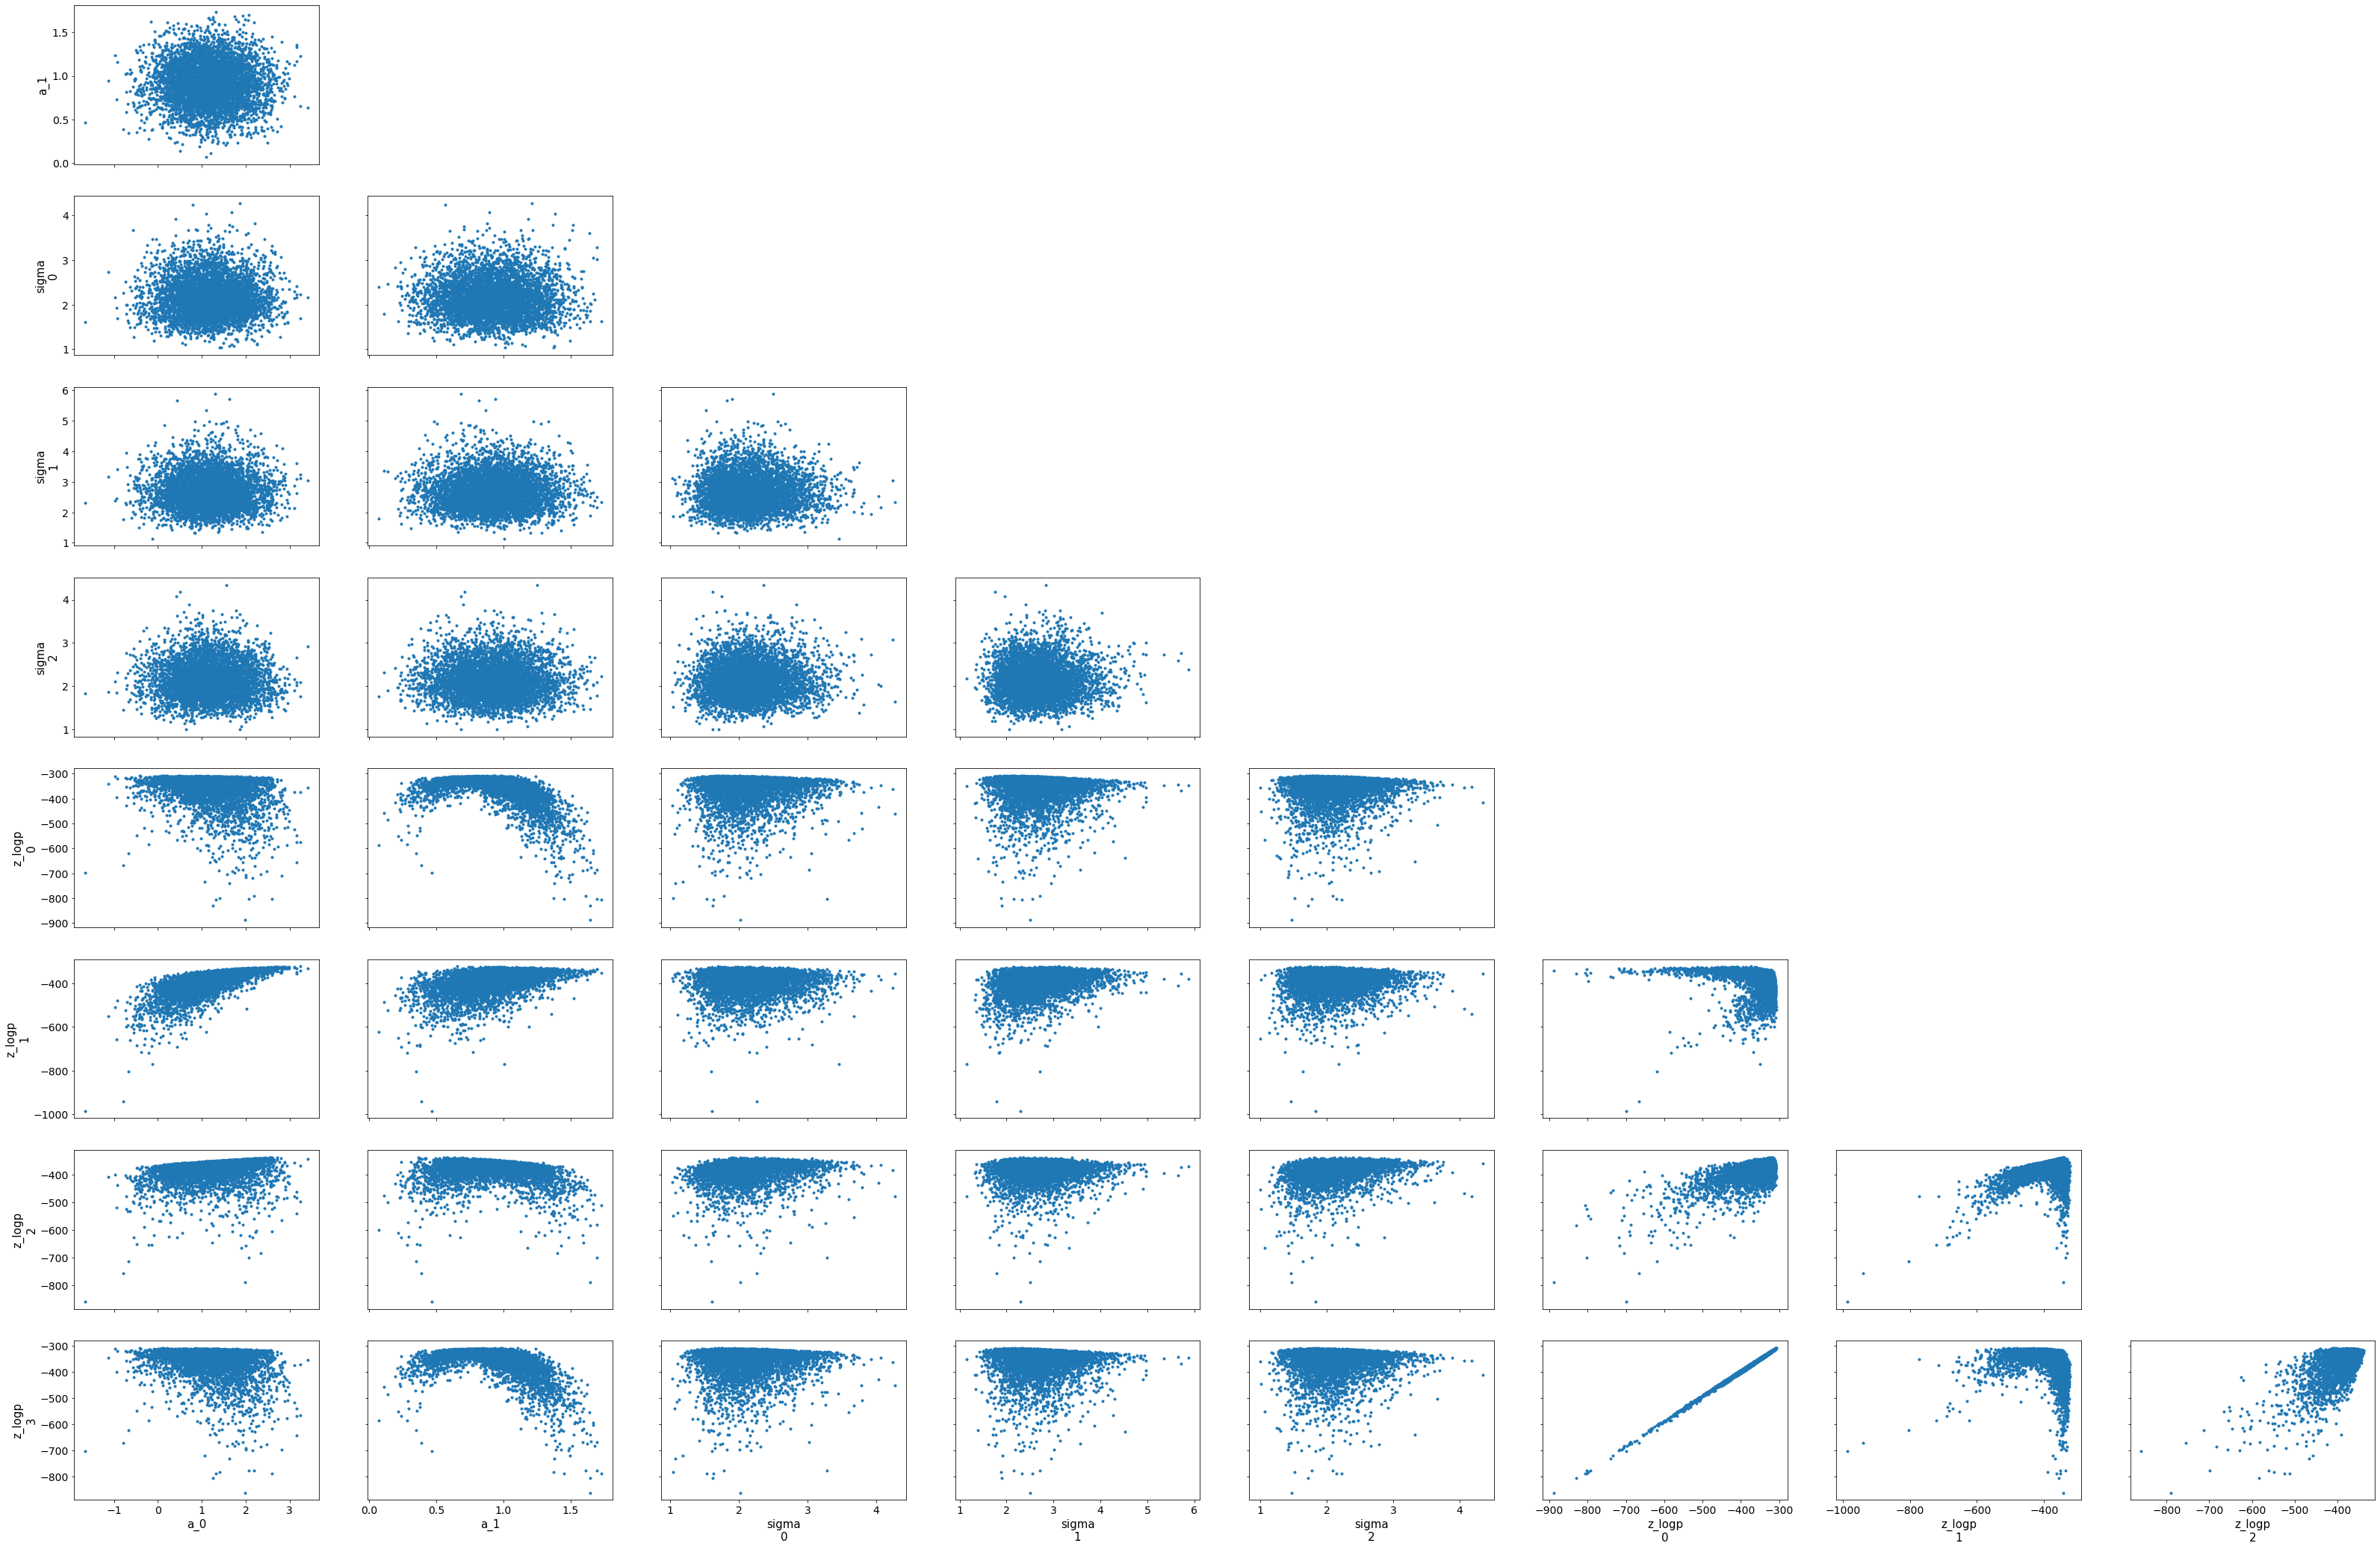

In [72]:
az.plot_pair(trace_fit_az)

array([[<AxesSubplot:title={'center':'a_0'}>,
        <AxesSubplot:title={'center':'a_0'}>],
       [<AxesSubplot:title={'center':'a_1'}>,
        <AxesSubplot:title={'center':'a_1'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'z_logp'}>,
        <AxesSubplot:title={'center':'z_logp'}>]], dtype=object)

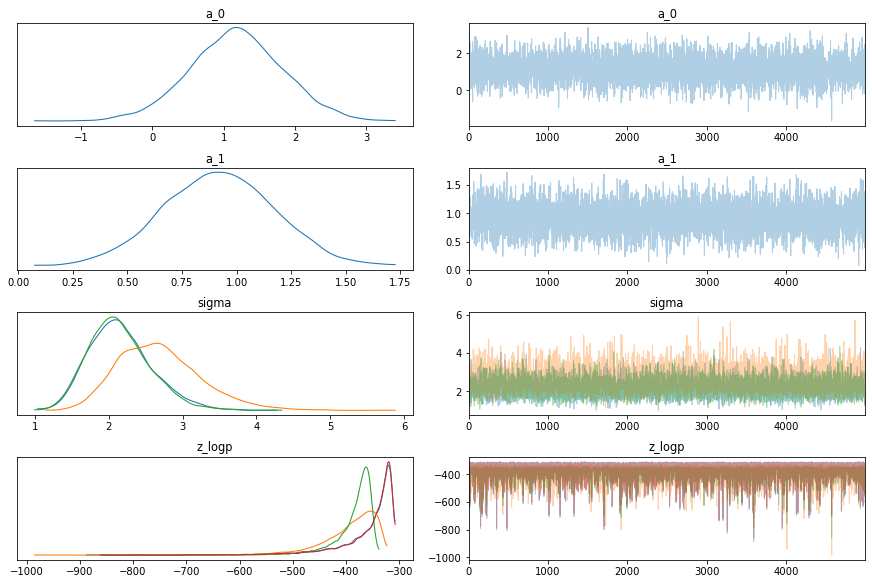

In [106]:
az.plot_trace(trace_fit_az)

# Plot posterior

In [68]:
trace_fit_az

Inference data with groups:
	> posterior

In [218]:
posterior = trace_fit_az.posterior

In [219]:
posterior.a_0, posterior.a_1, posterior.sigma

<xarray.DataArray 'a_0' (chain: 1, draw: 5000)>
array([[0.72803888, 1.24597465, 0.85397399, ..., 1.21805328, 0.51353414,
        0.95511457]])
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999

In [277]:
sample_data.keys()

dict_keys(['sigma', 'a_0', 'a_1', 'z', 'a', 'category_i', 'mu_i', 'outcome_i'])

In [279]:
print(sample_data['category_i'])
print(sample_data['outcome_i'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 2.92632751  6.53738664  5.58564405  6.91087637  6.73646219  3.11445248
  4.32419647  6.04179189  2.30910984  2.68691303  4.46231062  7.98432564
  4.42264217  3.0025434   8.11656197  5.8605584   6.96717179  5.97872537
  4.49371251  5.46502824  2.18303213  4.89109016  1.66075578  1.55095909
  5.07767824  6.66026479  7.35620229  5.61943036  5.78956291  3.38813538
  5.79396737  3.47351625  4.02753301 -0.44791394  4.22559327  3.65342117
  5.09204993  6.00250212  6.77753709  4.20248306  5.74160516  5.1445441
  3.83115488  6.11897113  4.48264639  8.37110756  3.24406049  4.42836195
  4.68360297  6.77683109  4.95169273  8.43971295  4.57106259  4.71304367
  8.74816698  2.66503471  6.65063657  

(2000, 3) (2000, 3)


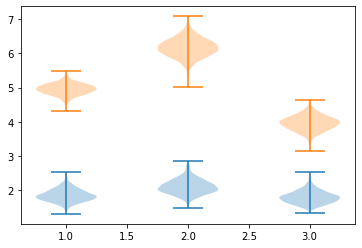

(3, 2000, 100)


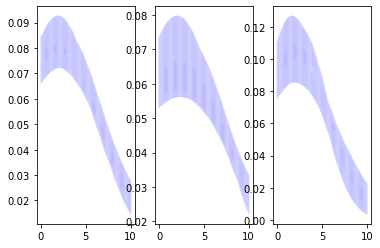

(2000, 3) (2000, 3)


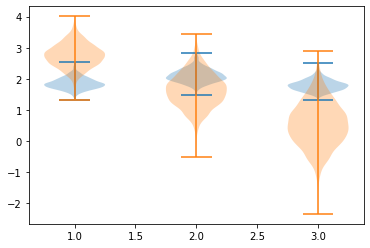

(3, 2000, 100)


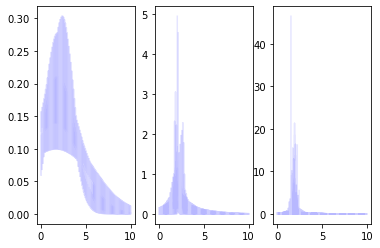

(2000, 3) (2000, 3)


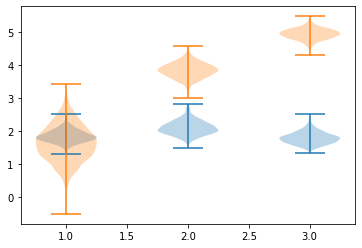

(3, 2000, 100)


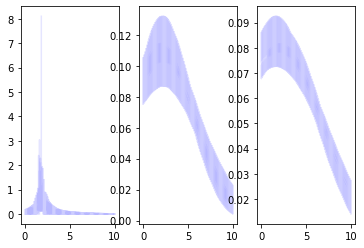

(2000, 3) (2000, 3)


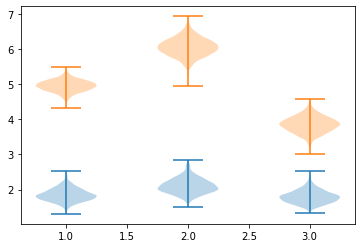

(3, 2000, 100)


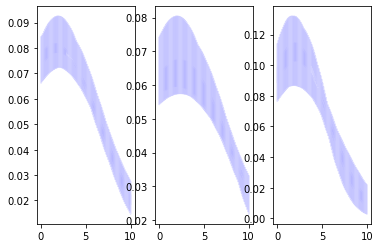

In [114]:
for i, LoT in enumerate(L):
    
    mus = posterior.a_0.values.flatten()[:,None] + posterior.a_1.values.flatten()[:,None] * LoT
    sigmas = posterior.sigma.values.reshape(-1,sigmas_trace.shape[-1])
    print(mus.shape, sigmas.shape)
    plt.violinplot(sigmas)
    plt.violinplot(mus)
    plt.show()
    
    xs = np.linspace(0, 10, 100)
    ys_trace = (
        stats
        .norm(sigmas[None], mus[None])
        .pdf(xs[:,None,None])
        .T
    )
    print(ys_trace.shape)
    fig, axes = plt.subplots(1,3)
    for j, ys in enumerate(ys_trace):
        axes[j].plot(
            np.tile(xs,(2000,1)), 
            ys, 
            color='blue', 
            alpha=0.1
        )
    plt.show()

# Posterior over LoTs

The trace has $s$ many samples from $p(\theta \mid \mathcal{X} )$ (see [this thread](https://discourse.pymc.io/t/marginalizing-out-a-categorical-variable/7091/9) for terminology). We have also stored $p( \mathcal{X} \mid \theta, \zeta )$ for each posterior sample. Therefore, we can approximate the following integral:

$$
\int p( \mathcal{X} \mid \theta, \zeta ) p( \theta \mid \mathcal{X} ) = p( \mathcal{X} \mid \zeta )
$$
as
$$
\frac{1}{s} \sum_{j=1}^s p( \mathcal{X} \mid \theta_j, \zeta_j )
$$

<BarContainer object of 4 artists>

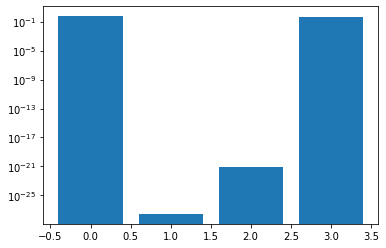

In [129]:
plt.bar(
    np.arange(len(LoT_posterior)), 
    LoT_posterior, 
    log=True
)

# Get an overview of the nets learning

In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
db_path = '/Users/faust/Desktop/neuralNetsLoT/reps-25_batch_size-8_num_epochs-400.db'

In [3]:
con = sql.connect(db_path)
cur = con.cursor()

Get the names of the tables

In [4]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('data',), ('status',)]


Get the column names

In [5]:
instruction = 'PRAGMA table_info("data")'
cur.execute(instruction)
rows = cur.fetchall()

Number of rows:

In [ ]:
res = cur.execute('SELECT COUNT(*) FROM data')

In [12]:
print(list(res))

[(659380000,)]


## Plot learning curves

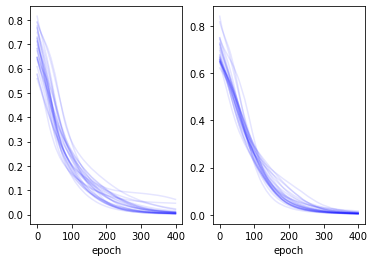

In [106]:
fig, axes = plt.subplots(1,2)
for i, (cat, df) in enumerate(cats_dfs.items()):
    df_cleaned = (
        df.groupby(
            [c for c in df.columns if c != 'batch' and c != 'loss'],
    #         as_index=True
        )
        .mean()
        .drop(columns='batch')
        .unstack()
        ['loss']
        .T
    )

    df_cleaned.plot(
        legend=False, 
        alpha=0.1, 
        color='blue',
        ax=axes[i]
    )

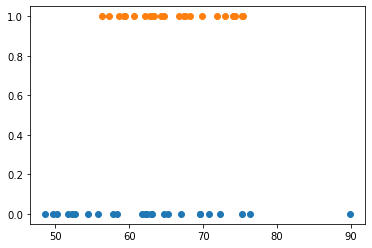

In [121]:
df = cats_dfs[100]
for i, df in enumerate(cats_dfs.values()):
    df_cleaned = (
        df.groupby(
            [c for c in df.columns if c != 'batch' and c != 'loss'],
    #         as_index=True
        )
        .mean()
        .drop(columns='batch')
        .unstack()
        ['loss']
        .T
    )
    plt.scatter(df_cleaned.sum(axis=0), [i]*25)

## Get the categories that have been saved

In [127]:
instruction = (
    'SELECT category, count(category) '
    'FROM data '
    'group by category'
)
cur.execute(instruction)
rows = cur.fetchall()

In [130]:
df = pd.DataFrame(rows, columns=['cat', 'n'])

In [154]:
df

,cat,n
0,0,20000
1,1,20000
2,2,20000
3,3,20000
4,4,20000
...,...,...
32762,32763,20000
32763,32764,20000
32764,32765,20000
32765,32766,20000


## Get learning efforts

In [14]:
fpath = '../neuralNetsLearning/learning_costs.pkl'

In [15]:
df_efforts = pd.read_pickle(fpath)

In [27]:
df_efforts

,category,rep,effort
0,0,0,35.322017
1,0,1,25.219702
2,0,2,37.827224
3,0,3,41.740061
4,0,4,27.399204
...,...,...,...
819195,32767,20,40.225559
819196,32767,21,44.391734
819197,32767,22,47.234875
819198,32767,23,45.459494


<AxesSubplot:xlabel='effort', ylabel='category'>

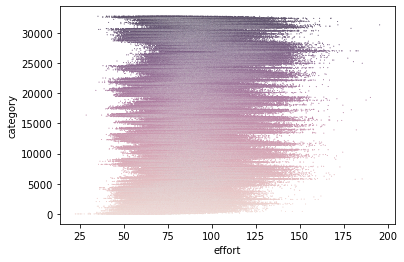

In [36]:
sns.scatterplot(
    x='effort',
    y='category',
    hue='category',
    data=df_efforts,
    s=1,
    legend=False
)

## Check status of individual categories

In [144]:
instruction = (
    'SELECT * FROM status'
#     'WHERE status != "d"'
)
cur.execute(instruction)
rows = cur.fetchall()

In [145]:
print(len(rows))

32768


Check that all categories are done:

In [146]:
for row in rows:
    if row[1] != 'd':
        print(row)

Change the status of category 11778 to 'w' so running the model calculates it automatically

Run this to change a single category back to 'w' (e.g. if it was unfinished, in this case category 11778):
```sql
    UPDATE status 
    SET status="w" 
    WHERE category=11778
```

# Get overview of minimal formulas lengths

In [61]:
import sqlite3 as sql
import pandas as pd
import numpy as np

In [5]:
db_path = '/Users/faust/Desktop/neuralNetsLoT/db_numprop-4_nestlim-100.db'

In [6]:
con = sql.connect(db_path)
cur = con.cursor()

In [7]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('status',), ('data',)]


In [8]:
p = 'PRAGMA table_info(data)'
cur.execute(p)
names = [x[1] for x in cur.fetchall()]

In [46]:
cur.execute('SELECT COUNT(*) FROM data')
print(cur.fetchall())

[(27525120,)]


In [48]:
# num of lines in db divided by (num of stored categories * 2)
# 
27525120 / (32768*2)

420.0

In [9]:
p = 'SELECT * FROM data LIMIT 1000'
df = pd.read_sql(p, con)

Things to consider

- I don't need to analyse inventories with inverse conditional or negated inverse conditional, because I know a priori they're gonna be identical to inventories with conditional and negated conditional, respectively, with respect to formula length.
    - These inventories are in fact already not in the stored formula lengths, so I can just forget about them.
- I can run the analysis with just the stored inventories and then just talk in the discussion in the paper about the fact that to each of these inventories correspond a dual one, but they're indistinguishable from a LoT point of view (they predict the same behaviour).

In [70]:
pd.read_pickle('./df_ids.db')

,O,A,N,C,B,X,NA,NOR,NC,invId
0,0,0,0,0,0,0,1,0,0,4
